'data.frame':	32561 obs. of  15 variables:
 $ V1 : int  39 50 38 53 28 37 49 52 31 42 ...
 $ V2 : Factor w/ 9 levels " ?"," Federal-gov",..: 8 7 5 5 5 5 5 7 5 5 ...
 $ V3 : int  77516 83311 215646 234721 338409 284582 160187 209642 45781 159449 ...
 $ V4 : Factor w/ 16 levels " 10th"," 11th",..: 10 10 12 2 10 13 7 12 13 10 ...
 $ V5 : int  13 13 9 7 13 14 5 9 14 13 ...
 $ V6 : Factor w/ 7 levels " Divorced"," Married-AF-spouse",..: 5 3 1 3 3 3 4 3 5 3 ...
 $ V7 : Factor w/ 15 levels " ?"," Adm-clerical",..: 2 5 7 7 11 5 9 5 11 5 ...
 $ V8 : Factor w/ 6 levels " Husband"," Not-in-family",..: 2 1 2 1 6 6 2 1 2 1 ...
 $ V9 : Factor w/ 5 levels " Amer-Indian-Eskimo",..: 5 5 5 3 3 5 3 5 5 5 ...
 $ V10: Factor w/ 2 levels " Female"," Male": 2 2 2 2 1 1 1 2 1 2 ...
 $ V11: int  2174 0 0 0 0 0 0 0 14084 5178 ...
 $ V12: int  0 0 0 0 0 0 0 0 0 0 ...
 $ V13: int  40 13 40 40 40 40 16 45 50 40 ...
 $ V14: Factor w/ 42 levels " ?"," Cambodia",..: 40 40 40 40 6 40 24 40 40 40 ...
 $ V15: Factor w/ 

[1] 4262

[1] 0

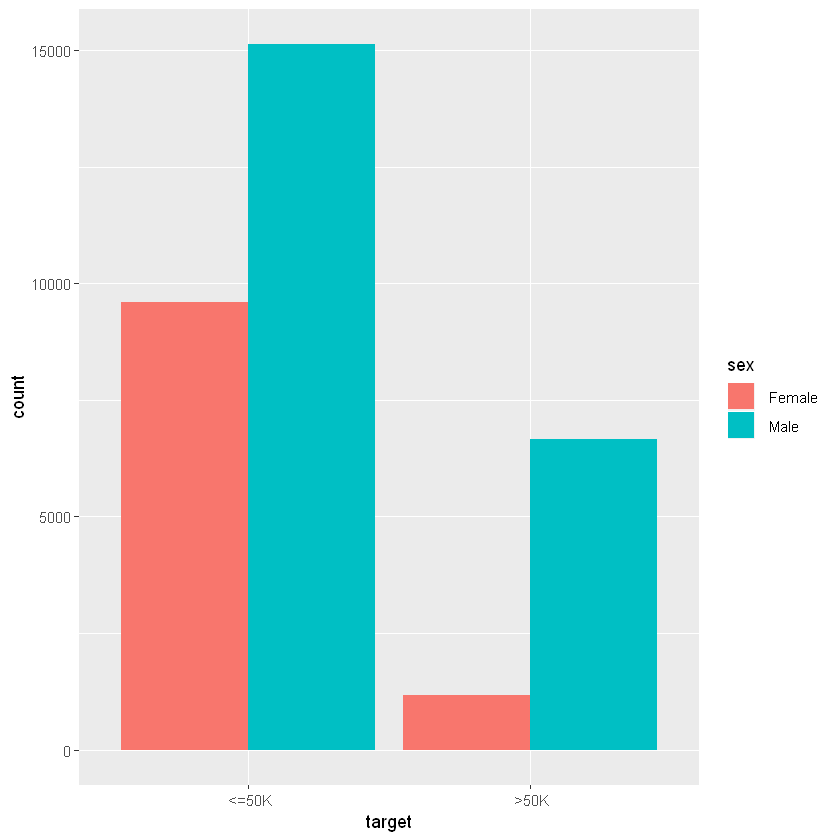

Loading required package: lattice


[1] 1.500077


1      4      7      9     10     12 
 <=50K  <=50K  <=50K   >50K   >50K   >50K 
Levels:  <=50K  >50K

Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   9394  1544
     >50K     494  1592
                                          
               Accuracy : 0.8435          
                 95% CI : (0.8372, 0.8497)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5168          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5077          
            Specificity : 0.9500          
         Pos Pred Value : 0.7632          
         Neg Pred Value : 0.8588          
             Prevalence : 0.2408          
         Detection Rate : 0.1222          
   Detection Prevalence : 0.1602          
      Balanced Accuracy : 0.7288          
                                          
       'Positive' Class :  >50K           
                                          

Rattle: A free graphical interface for data science with R.
Version 5.2.0 Copyright (c) 2006-2018 Togaware Pty Ltd.
Type 'rattle()' to shake, rattle, and roll your data.


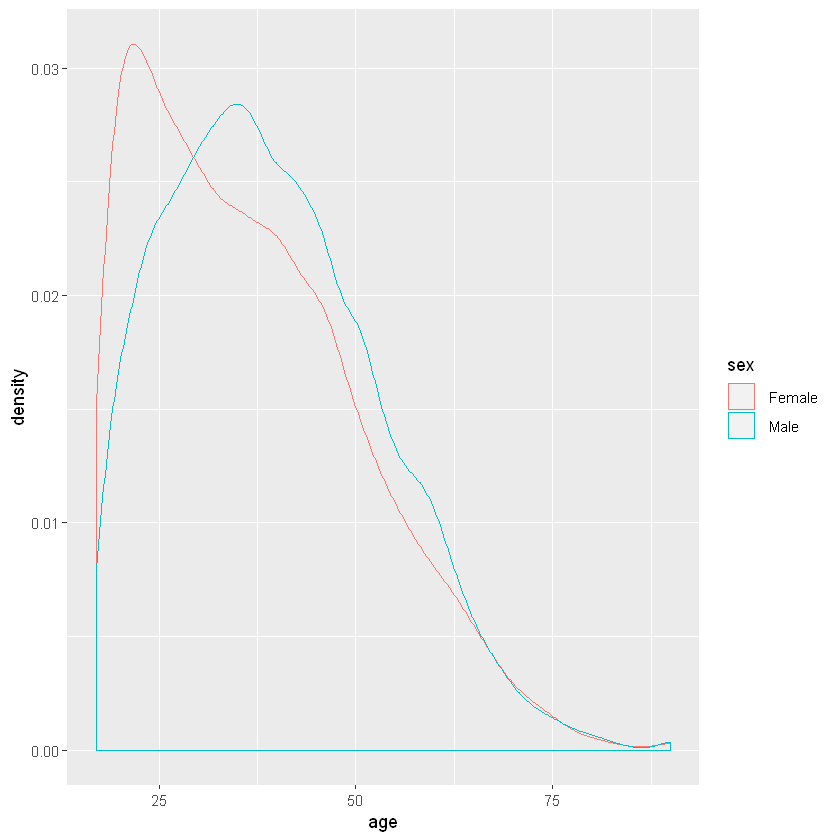

[1] 0.7
Confusion Matrix and Statistics

          Reference
Prediction  <=50K  >50K
     <=50K   7033  1138
     >50K     383  1214
                                          
               Accuracy : 0.8443          
                 95% CI : (0.8369, 0.8514)
    No Information Rate : 0.7592          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.5217          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.5162          
            Specificity : 0.9484          
         Pos Pred Value : 0.7602          
         Neg Pred Value : 0.8607          
             Prevalence : 0.2408          
         Detection Rate : 0.1243          
   Detection Prevalence : 0.1635          
      Balanced Accuracy : 0.7323          
                                          
       'Positive' Class :  >50K           
                                          


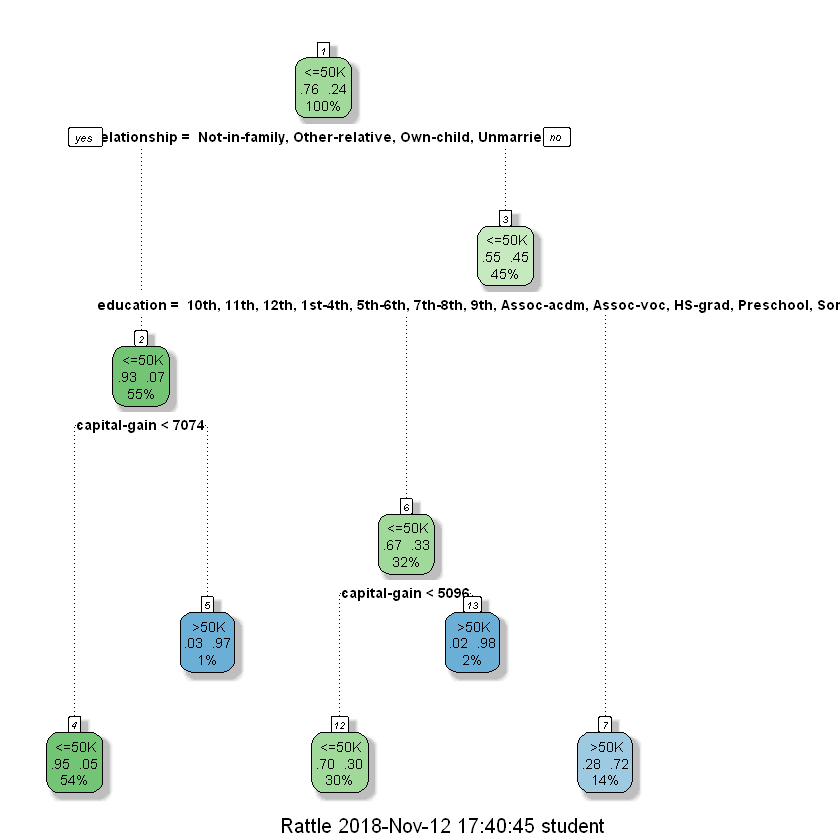

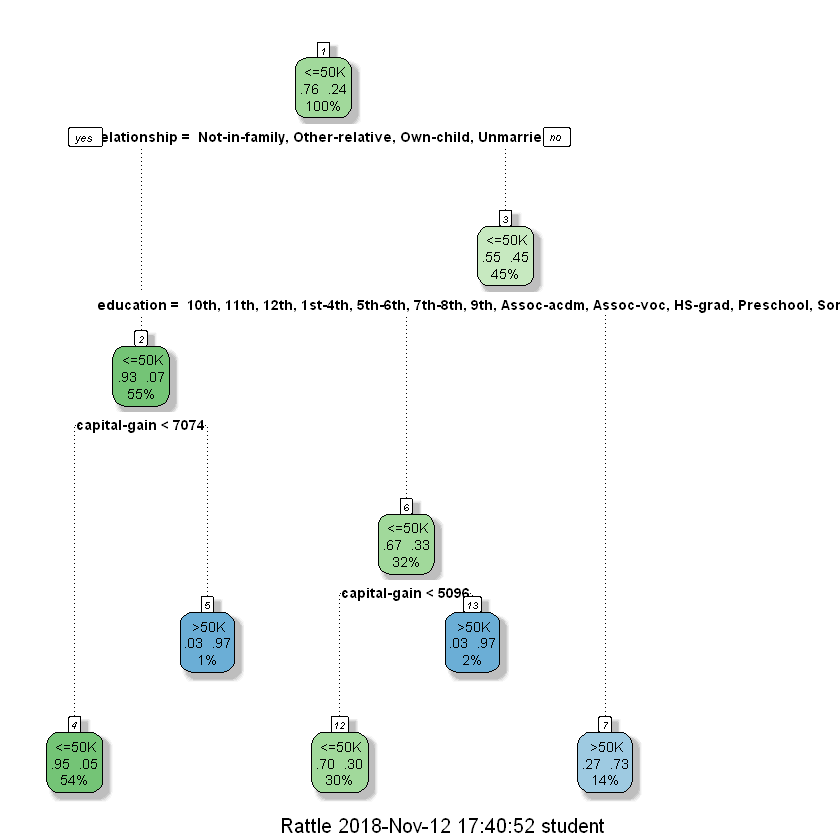

In [1]:

adult = read.csv("C:/Users/student/Desktop/Senior/MATH 421 - R/assignment/adult data.csv", header = FALSE)
str(adult)

names(adult) = c("age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "target")
str(adult)

adult[adult == " ?"] = NA

for (i in 1:ncol(adult)){
      print(c(names(adult)[i],sum(is.na(adult[i]))))
}


handlemiss = function(data)
{
  for (i in 1:ncol(data)){
    if (class(data[, i]) != "factor") 
    { 
      data[,i][is.na(data[,i])]= mean(data[,i], na.rm = TRUE)   
    } else {
      levels=unique(data[,i])
      data[,i][is.na(data[,i])]=levels[which.max(tabulate(match(data[,i], levels)))]
    } 
  }
  return(data)
}
newdata = handlemiss(adult)
sum(is.na(adult))
sum(is.na(newdata))


library(ggplot2)
bar = ggplot() + geom_bar(adult, mapping = aes(x = target, fill = sex), position = "dodge")
print(bar)
den = ggplot() + geom_density(adult, mapping = aes(x = age, color = sex))
print(den)


library(caret)
splitIndex <- createDataPartition(adult$target, p = .60, list = FALSE, times = 1)
train <- adult[ splitIndex,]
test <- adult[-splitIndex,]
print(nrow(train)/nrow(test))  #just to proof train is 1.5 times bigger than testing dataset (60/40)


library(rpart) 
mytree <- rpart(target ~ ., data = train, method = "class")
pred <- predict(mytree,test, type = "class")
head(pred)



cm=confusionMatrix(pred, test$target, positive = " >50K")
cm


library(rattle)
fancyRpartPlot(mytree)


#error ignore it
#model <- train(target ~.,data =train, method = "rpart")
#pred2=predict(model,test)

#cm2=confusionMatrix(pred2, test$target, positive=" >50K")
#cm2


decisiontree = function(df, n){

#assume target variable name "target"

splitIndex <- createDataPartition(df$target, p = n, list = FALSE, times = 1)
train <- adult[ splitIndex,]
test <- adult[-splitIndex,]


mytree <- rpart(target ~ ., data = train, method = "class")
pred <- predict(mytree,test, type = "class")

cm=confusionMatrix(pred, test$target, positive = " >50K")

print(n)
print(cm)
fancyRpartPlot(mytree)

}

decisiontree(adult, .7)



